<a href="https://colab.research.google.com/github/bhung-chung/ML-Zoomcamp/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error as rmse

In [ ]:
pd.__version__

'2.2.2'

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 23:40:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.02s   

2025-10-07 23:40:43 (41.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [ ]:
df['fuel_type'].unique()

array(['Gasoline', 'Diesel'], dtype=object)

In [ ]:
df.isnull().sum()

Number of columns with missing values: 4


In [ ]:
max_fuel_efficiency_asia = df[df['origin'] == 'Asia']['fuel_efficiency_mpg'].max()
print(f"Maximum fuel efficiency for cars from Asia: {max_fuel_efficiency_asia}")

Maximum fuel efficiency for cars from Asia: 23.759122836520497


In [ ]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [ ]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [ ]:
df['horsepower'].median()

149.0

In [ ]:
df['horsepower'].mode()

,horsepower
0,152.0


In [ ]:
df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)

/tmp/ipython-input-1392585663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)


In [ ]:
df['horsepower'].median()

152.0

In [ ]:
df2 = df[df['origin']=='Asia']

In [ ]:
X = df2[['vehicle_weight','model_year']].head(7).to_numpy()

In [ ]:
print(X)

[[2714.21930965 2016.        ]
 [2783.86897424 2010.        ]
 [3582.68736772 2007.        ]
 [2231.8081416  2011.        ]
 [2659.43145076 2016.        ]
 [2844.22753389 2014.        ]
 [3761.99403819 2019.        ]]


In [ ]:
XTX = np.matmul(X.T,X)

In [ ]:
XTX

array([[62248334.33150762, 41431216.5073268 ],
       [41431216.5073268 , 28373339.        ]])

In [ ]:
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])

In [ ]:
w =np.matmul(np.matmul(np.linalg.inv(XTX), X.T),y)

In [ ]:
w.sum()

np.float64(0.5187709081074016)

<Axes: ylabel='fuel_efficiency_mpg'>

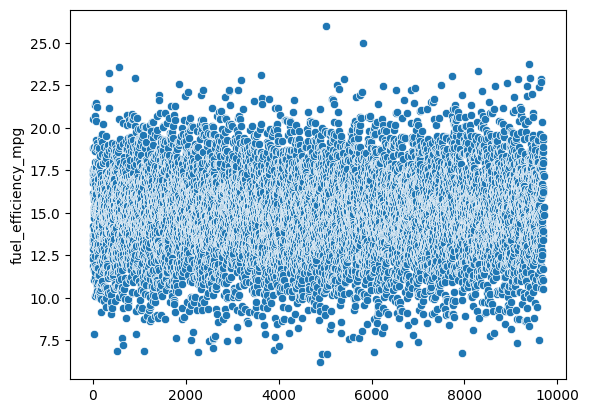

In [4]:
sns.scatterplot(df['fuel_efficiency_mpg'])

In [47]:
df2 = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [6]:
df2.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


(array([4.300e+01, 2.460e+02, 9.880e+02, 2.259e+03, 2.913e+03, 2.165e+03,
        8.610e+02, 1.940e+02, 3.300e+01, 2.000e+00]),
 array([ 6.20097053,  8.17759568, 10.15422084, 12.13084599, 14.10747114,
        16.08409629, 18.06072144, 20.03734659, 22.01397175, 23.9905969 ,
        25.96722205]),
 <BarContainer object of 10 artists>)

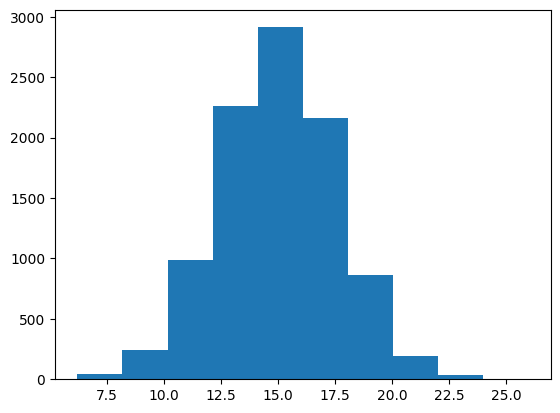

In [34]:
plt.hist(df2['fuel_efficiency_mpg'])

In [48]:
df2.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [39]:
np.random.seed(42)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop('fuel_efficiency_mpg', axis =1), df2['fuel_efficiency_mpg'],
    test_size=0.4, # 20% for testing, 80% for training
    random_state=42, # for reproducibility of the split
    # stratify= df2['fuel_efficiency_mpg'] # for stratified sampling to maintain class distribution
)

In [51]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test,
    test_size=0.5, # 20% for testing, 80% for training
    random_state=42, # for reproducibility of the split
    # stratify= df2['fuel_efficiency_mpg'] # for stratified sampling to maintain class distribution
)

In [52]:
medi_A = X_train.horsepower.median()

In [57]:
X_train_filled = X_train.fillna(0)
X_val_filled = X_val.fillna(0)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X_train_filled, y_train)

LinearRegression()

In [60]:
y_v = lr.predict(X_val_filled)
print(rmse(y_v, y_val))

0.517291936381243


Median = 0.4603579227175432
0 = 0.517291936381243

In [61]:
from sklearn.linear_model import Ridge

# Fill missing values with 0
X_train_filled = X_train.fillna(0)
X_val_filled = X_val.fillna(0)

# Define the list of regularization parameters
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

# Iterate through the r values, train Ridge models, and evaluate
for r in r_values:
    # Initialize Ridge model with alpha (regularization parameter)
    model = Ridge(alpha=r, solver='cholesky') # Using cholesky solver for compatibility with potential singular matrices

    # Train the model
    model.fit(X_train_filled, y_train)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_filled)

    # Calculate RMSE and round to 2 decimal places
    score = round(rmse(y_pred_val, y_val), 2)

    # Store the RMSE score
    rmse_scores[r] = score

# Find the r with the best (lowest) RMSE
best_r = min(rmse_scores, key=rmse_scores.get)

print("RMSE scores for different regularization values:")
for r, score in rmse_scores.items():
    print(f"r = {r}: RMSE = {score}")

print(f"\nThe regularization parameter 'r' that gives the best RMSE is: {best_r}")

RMSE scores for different regularization values:
r = 0: RMSE = 0.52
r = 0.01: RMSE = 0.52
r = 0.1: RMSE = 0.52
r = 1: RMSE = 0.52
r = 5: RMSE = 0.52
r = 10: RMSE = 0.52
r = 100: RMSE = 0.52

The regularization parameter 'r' that gives the best RMSE is: 0


In [62]:
# Define the list of seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores_by_seed = []

# Iterate through the seeds
for seed in seeds:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        df2.drop('fuel_efficiency_mpg', axis=1), df2['fuel_efficiency_mpg'],
        test_size=0.4, # 40% for testing and validation
        random_state=seed
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_test, y_test,
        test_size=0.5, # 20% for testing, 20% for validation from the 40%
        random_state=seed
    )

    # Fill missing values with 0
    X_train_filled = X_train.fillna(0)
    X_val_filled = X_val.fillna(0)

    # Train a linear regression model without regularization
    model = LinearRegression()
    model.fit(X_train_filled, y_train)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_filled)

    # Calculate RMSE and store the score
    score = rmse(y_pred_val, y_val)
    rmse_scores_by_seed.append(score)

# Calculate the standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores_by_seed)

# Round the standard deviation to 3 decimal digits
rounded_std_rmse = round(std_rmse, 3)

print("RMSE scores for different seeds:", rmse_scores_by_seed)
print(f"\nStandard deviation of RMSE scores across different seeds: {rounded_std_rmse}")

RMSE scores for different seeds: [0.5179731156751234, 0.517100876096144, 0.519800520352805, 0.5216788361090199, 0.5113797805540858, 0.5150858903171902, 0.5146006558286665, 0.5357330865003462, 0.5185192243344598, 0.519778287852228]

Standard deviation of RMSE scores across different seeds: 0.006


In [66]:
import numpy as np, random
np.random.seed(9)
random.seed(9)

In [69]:
# Split the data using seed 9
X_train, X_test, y_train, y_test = train_test_split(
    df2.drop('fuel_efficiency_mpg', axis=1), df2['fuel_efficiency_mpg'],
    test_size=0.4, # 40% for testing and validation
    random_state=9
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test,
    test_size=0.5, # 20% for testing, 20% for validation from the 40%
    random_state=9
)

# Combine train and validation datasets
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# Fill missing values with 0
X_train_full_filled = X_train_full.fillna(0)
X_test_filled = X_test.fillna(0)


# Train a Ridge model with r=0.001
model = Ridge(alpha=0.001, solver='cholesky')
model.fit(X_train_full_filled, y_train_full)

# Make predictions on the test set
y_pred_test = model.predict(X_test_filled)

# Calculate RMSE on the test set
rmse_test = rmse(y_pred_test, y_test)

print(f"RMSE on the test dataset with seed 9 and r=0.001: {rmse_test}")

RMSE on the test dataset with seed 9 and r=0.001: 0.5209701902803475
